# **Develop a machine learning method for material property prediction.**

---
### **Project created by -**

> Name : Somesh Ghosh

> Registration Number : 2022UGEC013

---

### **Submitted to -**

> Dr. Ram Krishna

> Assistant Professor

> Metallurgical and Materials Engineering

---

### **Objective**
To predict materials from a list of available materials which can be used for the production of solar cells based on their band gap energy and other properties.


### **Band Gap Dataset**
The band gap dataset is downloaded from the following website : 

https://citrination.com/datasets/1160/show_files

These datasets are compiled by two scientists - W.H. Strehlow and E.L. Cook in 1973. The dataset
Throughout the lab we'll be working with a digitized version of a band gap dataset compiled by two scientists, W.H. Strehlow and E.L. Cook. They compiled this dataset of elementary and binary compound semiconductors in 1973 by searching through 723 individual references. Along with simply compiling reported measurements they also took the time to identify more and less reliable data points by taking "into consideration the material, the method of measurement, the reported sample purity, and the experimental conditions." They also comment that experimental measures are often greater than 5% in error and seldom less than 1%. 

* Installing pymatgen, graphviz, mastml, helper functions in google colab environment.

* Mounting my google collaboratory with google drive for fetching datasets stored on cloud

* These packages/libraries are pre-installed in google collaboratory hence need not to be installed explicitly. They are pandas, numpy, matplotlib, seaborn and sklearn.

 **Here is a brief description of each package/libraries used in this project:**


*   **os** - OS stands for Operating System and provides methods/functions for python to interact with files or directories.

*   **collections** - The collection Module in Python provides different types of containers. A counter is a sub-class of the dictionary. It is used to keep the count of the elements in an iterable in the form of an unordered dictionary where the key represents the element in the iterable and value represents the count of that element in the iterable.

*  **pprint** - The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter.

* **Pandas** is a library used for data manipulation and analysis, providing high-performance and easy-to-use data structures such as dataframes. It can read and write data in various formats such as CSV, Excel, SQL, and many others.

* **Numpy** is a library used for numerical computations in Python. It provides an array object that is more efficient and convenient than Python's built-in lists. NumPy also offers a wide range of mathematical functions for linear algebra, Fourier analysis, and more.

* **Pymatgen** PyMatGen is a library used for materials analysis in Python. It offers a range of tools for structure analysis, electronic structure analysis, and thermodynamic analysis of materials. PyMatGen is widely used in materials science and engineering.

* **Matplotlib** is a data visualization library for creating static, animated, and interactive visualizations in Python. It provides a wide range of customization options for creating various types of plots, such as line charts, scatter plots, histograms, bar charts, etc.

* **Seaborn** is a Python data visualization library built on top of matplotlib. It provides a higher-level interface for creating attractive and informative statistical graphics. Seaborn includes several built-in themes and color palettes, which make it easy to create beautiful visualizations without having to customize every detail.

* **Scikit-learn** (also known as sklearn) is a popular machine learning library for Python. It provides a variety of tools for classification, regression, clustering, and other machine learning tasks. Scikit-learn includes several built-in datasets, as well as a wide range of algorithms for preprocessing data, feature selection, model selection, and evaluation.

* **Graphviz** is an open-source visualization library for graph visualization. It allows you to create diagrams and flowcharts using a simple syntax, and can generate diagrams in various formats, including PNG, PDF, SVG, etc. It can be used in conjunction with other Python libraries like NetworkX and Pydot.

* **Helper functions** in Python are small, reusable pieces of code that perform a specific task or calculation. They are often used to simplify complex algorithms or to make code more readable and maintainable.

## **Predicting Potential Materials for Solar Cells**

To have good efficiency of material to be used as solar cells, we need a material with a band gap in the range of 1.0 eV to 1.7 eV. Hence our model should have an accuracy of +-0.35 eV.

This data is extracted from here:
http://solarcellcentral.com/junction_page.html

ref1.img

In [1]:
!pip install pymatgen==2020.12.31
!apt-get -qq install -y graphviz && pip install pydot
!pip install helper-funcs
!pip install mastml
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.1/515.1 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 43.0 MB/s eta 0:00:00
  Created wheel for pymatgen: filename=pymatgen-2020.12.31-cp38-cp38-linux_x86_64.whl size=4092741 sha256=f2d7a3bbcf62a44e1728288863bfdb2670fa92a482dd83deabf8299afd0317d6
  Stored in directory: /root/.cache/pip/wheels/07/b2/5e/f3fcc3b7f8fe0c966015a1deb4a0e22de3d373c93140ae20ee
Successfully built pymatgen
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

In [2]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
citrination-client==6.5.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cryptography==39.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022

In [3]:
import os                        # OS stands for Operating System and provides ways for python to interact with files or directories
from collections import Counter  # Collections is a package for handling data
from pprint import pprint
import pandas as pd              # Pandas is a data analysis library which we'll primarily use to handle our dataset
import numpy as np               # Numpy is a package for scientific computing. We'll use it for some of it's math functions
import pymatgen                  # Pymatgen is a library for materials analysis which we use to interpret our material compositions

In [4]:
import matplotlib                # Matplotlib is the plotting package that we'll use throughout the lab
import matplotlib.pyplot as plt
import seaborn as sns            # Seaborn is a Python data visualization library based on matplotlib

In [5]:
import sklearn                   # Scikit-learn is a machine learning package, providing the backbone for the work we'll perform
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate,GridSearchCV,ParameterGrid
from sklearn.model_selection import KFold,RepeatedKFold

In [6]:
import graphviz                  # graphviz is a package that helps visualize decision trees

In [7]:
from helper_funcs import *

In [8]:
seed = 2345312

## **Filtering and Cleaning Data**

Importing the Dataset as dataframe (a data structure of ```pandas``` package) and storing in ```mastml_df``` dataframe.



In [9]:
# Read in the band gap data from our dataset
mastml_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bandgap_data_v2.csv")

In [10]:
mastml_df

,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
2,2,Li1F1,12.60,eV,Estimated,2
3,3,Li1F1,12.10,eV,Absorption,2
4,4,Li1F1,12.00,eV,Absorption,2
...,...,...,...,...,...,...
1442,1454,Th1O2,3.30,eV,Reflection,2
1443,1455,UO,1.50,eV,Thermal activation,1
1444,1456,U1O2,2.18,eV,Absorption,1
1445,1457,UO,0.60,eV,Thermal activation,2


The data is categorized with reliability of 1 and 2. We want most reliable data for training our model and testing it. Hence we are filtering data with reliability of 1 and storing it in ```mastml_df_filtered``` dataframe.

In [11]:
# Filter for only Reliability 1
mastml_df_filtered = mastml_df[mastml_df["Reliability"]==1]

In [12]:
# Print filtered data
mastml_df_filtered

,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.600,eV,Reflection,1
1,1,Li1F1,12.610,eV,Reflection,1
6,6,Li1Cl1,9.330,eV,Reflection,1
7,7,Li1Br1,7.950,eV,Absorption,1
9,9,Li3Sb1,1.000,eV,Thermal activation,1
...,...,...,...,...,...,...
1433,1445,Bi,0.015,eV,Magnetoreflection,1
1436,1448,Th1O2,5.750,eV,NaN,1
1437,1449,Th1O2,3.500,eV,Absorption,1
1443,1455,UO,1.500,eV,Thermal activation,1


Some elements are present more than one time with different band gap values. To avoid any ambiguity, that is, two different outputs for same input, we are taking average of all output values for same input and storing it in ```mastml_df_clean``` dataframe.

In [13]:
# Taking average of multiple measurements for same chemical formulas
mastml_df_clean = mastml_df_filtered.groupby("chemicalFormula Clean", as_index = False).mean()
mastml_df_clean

,chemicalFormula Clean,index,Band gap values Clean,Reliability
0,Ag1Br1,808.5,3.485,1.0
1,Ag1Cl1,793.5,4.190,1.0
2,Ag1N3,783.0,3.900,1.0
3,Ag1Te1,820.0,0.850,1.0
4,Ag2O1,785.0,1.200,1.0
...,...,...,...,...
462,Zr1Se2,739.0,2.000,1.0
463,Zr1Se3,740.0,1.250,1.0
464,Zr3O1,730.0,0.200,1.0
465,Zr6O1,729.0,0.180,1.0


**Understanding Data through:**

Here we are trying to get how our data looks like, what is its range, mean, maximum value, etc. using the following ways:

a) Statistics *(mean, count, max, etc.)*

b) Histograms

In [14]:
# generate basic statistics on our band gap values
mastml_df_clean["Band gap values Clean"].describe().round(3)

count    467.000
mean       2.231
std        2.287
min        0.009
25%        0.695
50%        1.435
75%        3.000
max       13.105
Name: Band gap values Clean, dtype: float64

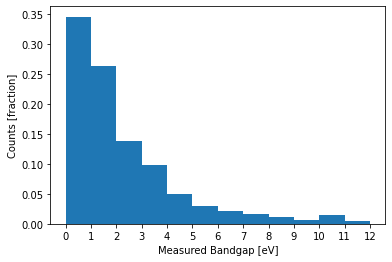

In [15]:
# we'll also define a simple histogram plotting function to use later
def histogram_plot(data):
    fig1,ax1 = plt.subplots()
    ax1.hist(data,bins=range(13),density=1)
    ax1.set_xticks(range(13))
    ax1.set_xlabel('Measured Bandgap [eV]')
    ax1.set_ylabel('Counts [fraction]')
    plt.show()

histogram_plot(mastml_df_clean["Band gap values Clean"].astype("float"))

Here we are trying to see which element is present in the data and in what quantity throughout all the compounds present in the filtered and cleaned dataset.

In [16]:
# parse out individual elements for each formula using pymatgen's composition parser
element_list = list()
for idx in mastml_df.index:
    element_list.extend(pymatgen.core.composition.Composition(mastml_df["chemicalFormula Clean"][idx]).elements)
    
# setup a counter to count each element
temp_counter = Counter(element_list)
element_tuples = list(zip(list(temp_counter.keys()),list(temp_counter.values())))
element_df = pd.DataFrame(element_tuples,columns=["Element","Count"])
element_df_sorted = element_df.sort_values(by=["Count"],ascending=False)

element_df_sorted

,Element,Count
8,O,240
10,Se,196
9,S,191
11,Te,187
15,As,141
...,...,...
66,Ta,3
39,Y,3
70,Ir,2
62,Tm,1


In [17]:
cwd = os.getcwd()
generated_features_path = os.path.join(cwd,"/content/drive/MyDrive/Colab Notebooks/data/generated_features.csv")
features_df = pd.read_csv(generated_features_path)
features_df.head()

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,AtomicWeight_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average,BCCfermi_composition_average,BCCmagmom_composition_average,BCCvolume_pa_composition_average,BCCvolume_padiff_composition_average,...,ThermalExpansionCoefficient_composition_average,ThirdIonizationEnergy_composition_average,n_ws^third_composition_average,phi_composition_average,valence_composition_average,index,Reliability,Band gap units,chemicalFormula Clean,Band gap values Clean
0,6,1.135,9311.576313,12.969702,5.772386,-1.346741,-0.679877,0,12.470,-0.680417,...,923.00,92.57900,0.49,1.4250,1,0,1,eV,Li1F1,13.105
1,10,1.270,9169.525548,21.197000,6.658641,-1.410040,1.219961,0,18.525,-2.020417,...,23.00,81.03100,0.49,1.4250,4,6,1,eV,Li1Cl1,9.330
2,19,1.345,32.035942,43.422500,6.919518,-1.432083,1.117212,0,21.035,-2.001667,...,23.00,79.22550,0.49,1.4250,4,7,1,eV,Li1Br1,7.950
3,15,1.560,23.705899,35.645750,6.704252,-2.371630,2.267697,0,19.155,-1.180000,...,37.25,98.16325,1.05,3.2375,2,9,1,eV,Li3Sb1,1.000
4,28,1.440,32.101458,66.922735,7.343549,-1.459519,2.360221,0,25.935,-3.869167,...,66.50,77.72550,0.49,1.4250,4,10,1,eV,Li1I1,6.000


Added new features using MAST-ML packages which generates Composition Average Elemental Properties to the ```features``` dataset.

In [18]:
target_data_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/target_data.csv")
target_data_df # our original dataset with inputs and outputs

,chemicalFormula Clean,Band gap values Clean,Band gap units,index,Reliability
0,Li1F1,13.1050,eV,0,1
1,Li1Cl1,9.3300,eV,6,1
2,Li1Br1,7.9500,eV,7,1
3,Li3Sb1,1.0000,eV,9,1
4,Li1I1,6.0000,eV,10,1
...,...,...,...,...,...
462,Bi1I3,1.9625,eV,1437,1
463,Bi,0.0150,eV,1445,1
464,Th1O2,4.6250,eV,1448,1
465,UO,1.5000,eV,1455,1


In [19]:
features_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/features.csv")
features_df # features generated using MAST-ML

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,AtomicWeight_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average,BCCfermi_composition_average,BCCmagmom_composition_average,BCCvolume_pa_composition_average,BCCvolume_padiff_composition_average,...,SecondIonizationEnergy_composition_average,ShearModulus_composition_average,SpaceGroupNumber_composition_average,SpecificHeatCapacity_composition_average,ThermalConductivity_composition_average,ThermalExpansionCoefficient_composition_average,ThirdIonizationEnergy_composition_average,n_ws^third_composition_average,phi_composition_average,valence_composition_average
0,6.000000,1.135000,9311.576313,12.969702,5.772386,-1.346741,-0.679877,0.0,12.4700,-0.680417,...,55.804000,2.100000,122.00,2.203000,42.363950,923.000000,92.579000,0.490000,1.4250,1.000000
1,10.000000,1.270000,9169.525548,21.197000,6.658641,-1.410040,1.219961,0.0,18.5250,-2.020417,...,50.224000,2.100000,146.50,2.031000,42.354450,23.000000,81.031000,0.490000,1.4250,4.000000
2,19.000000,1.345000,32.035942,43.422500,6.919518,-1.432083,1.117212,0.0,21.0350,-2.001667,...,49.219000,2.100000,146.50,1.904000,42.411000,23.000000,79.225500,0.490000,1.4250,4.000000
3,15.000000,1.560000,23.705899,35.645750,6.704252,-2.371630,2.267697,0.0,19.1550,-1.180000,...,61.611000,8.150000,213.25,2.738250,69.600000,37.250000,98.163250,1.050000,3.2375,2.000000
4,28.000000,1.440000,32.101458,66.922735,7.343549,-1.459519,2.360221,0.0,25.9350,-3.869167,...,47.884500,2.100000,146.50,1.863500,42.574500,66.500000,77.725500,0.490000,1.4250,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,60.500000,1.422500,40.865008,147.423452,8.158525,-1.763974,5.485714,0.0,33.9975,-6.501250,...,18.520000,3.000000,51.00,0.139250,2.304250,68.600000,31.139750,0.290000,1.0375,6.500000
463,83.000000,1.700000,35.483459,208.980400,7.821898,-3.895384,8.463157,0.0,29.9100,-3.040000,...,16.687000,12.000000,12.00,0.122000,7.870000,13.400000,25.559000,1.160000,4.1500,5.000000
464,35.333333,1.086000,12405.753340,88.012287,5.956046,-4.062017,4.524067,0.0,15.8700,-0.990000,...,27.246000,10.333333,83.00,0.651000,18.178267,523.666667,43.290333,0.426667,1.1000,2.666667
465,50.000000,1.057500,9306.473007,127.014155,5.880448,-6.738583,8.971338,0.0,13.7800,-0.785000,...,17.558500,55.500000,37.50,0.520000,13.933700,396.950000,27.467000,0.755000,1.9500,4.000000


The Features that we've generated are all compositional averages of elemental properties. Using an existing database of elemental properties, the MASTML code reads in each of the chemical formulas in the dataset and combines each elemental property for each element in the formula according to the following equation:  
  
\begin{equation}
Property\_CompositionAverage = \frac{A \cdot Property\_Value_A + B \cdot Property\_Value_B}{A + B}
\end{equation}
  
Where A and B are the amounts of each element in the formula.

# **Preparing datasets for training**

### **Remove Constant Columns**
Columns with constant values for all data points will not help the model learn anything. Hence we are removing them.

In [20]:
# Remove Constant Columns
features_df_noconstant = features_df.loc[:, (features_df != features_df.iloc[0]).any()] 

# report number of columns
len(features_df_noconstant.columns)

86

### **Remove Highly Correlated Features**

Features that are extremely don't give any additional information and overload the model hence removing them.

In [21]:
# Remove Highly correlated Features
features_corr_df = features_df_noconstant.corr(method="pearson").abs()
features_corr_df.iloc[:5, :5] # Preview the first 5 rows/columns of the correlation matrix

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,AtomicWeight_composition_average,BCCefflatcnt_composition_average
AtomicNumber_composition_average,1.000000,0.585580,0.405061,0.998598,0.628049
AtomicRadii_composition_average,0.585580,1.000000,0.609457,0.571820,0.918506
AtomicVolume_composition_average,0.405061,0.609457,1.000000,0.382296,0.449378
AtomicWeight_composition_average,0.998598,0.571820,0.382296,1.000000,0.615523
BCCefflatcnt_composition_average,0.628049,0.918506,0.449378,0.615523,1.000000


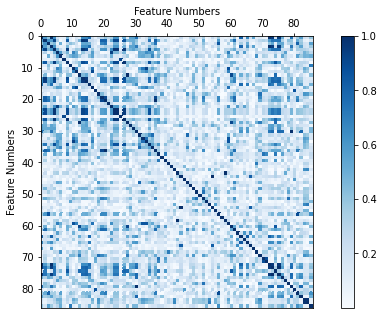

In [22]:
# before removing correlated features
fig1, ax1 = plt.subplots(figsize=(10,5))
c = ax1.pcolor(features_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')
plt.colorbar(c,ax=ax1)
plt.show()

In [23]:
# Filter the features with correlation coefficients above 0.95
upper = features_corr_df.where(np.triu(np.ones(features_corr_df.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
features_df_lowcorr = features_df_noconstant.drop(columns=to_drop)
# recalculate the correlation matrix so we can compare
features_corr_df_update = features_df_lowcorr.corr(method="pearson").abs()

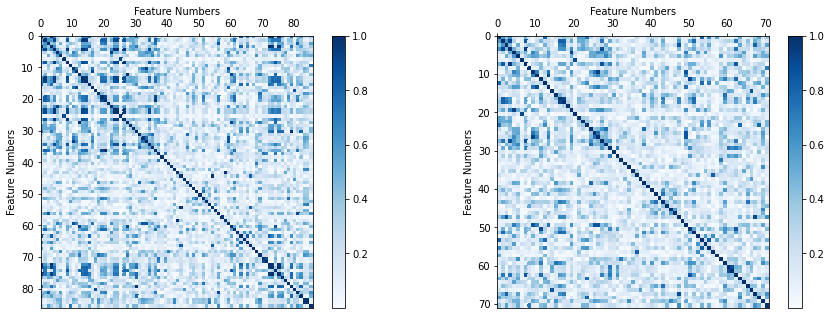

In [24]:
# plot correlation after removing highly correlated features

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
c1 = ax1.pcolor(features_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')

plt.colorbar(c1,ax=ax1)

c2 = ax2.pcolor(features_corr_df_update,cmap="Blues")
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Feature Numbers')
ax2.set_ylabel('Feature Numbers')
ax2.set_aspect('equal')
plt.colorbar(c2,ax=ax2)
plt.show()

In [25]:
len(features_df_lowcorr.columns)

71

In [26]:
features_df_lowcorr

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average,BCCfermi_composition_average,BCCmagmom_composition_average,BCCvolume_pa_composition_average,BCCvolume_padiff_composition_average,BoilingT_composition_average,...,NsValence_composition_average,Polarizability_composition_average,SecondIonizationEnergy_composition_average,ShearModulus_composition_average,SpaceGroupNumber_composition_average,ThermalConductivity_composition_average,ThermalExpansionCoefficient_composition_average,ThirdIonizationEnergy_composition_average,n_ws^third_composition_average,valence_composition_average
0,6.000000,1.135000,9311.576313,5.772386,-1.346741,-0.679877,0.0,12.4700,-0.680417,849.940000,...,1.50,12.446000,55.804000,2.100000,122.00,42.363950,923.000000,92.579000,0.490000,1.000000
1,10.000000,1.270000,9169.525548,6.658641,-1.410040,1.219961,0.0,18.5250,-2.020417,926.980000,...,1.50,13.257500,50.224000,2.100000,146.50,42.354450,23.000000,81.031000,0.490000,4.000000
2,19.000000,1.345000,32.035942,6.919518,-1.432083,1.117212,0.0,21.0350,-2.001667,973.500000,...,1.50,13.692500,49.219000,2.100000,146.50,42.411000,23.000000,79.225500,0.490000,4.000000
3,15.000000,1.560000,23.705899,6.704252,-2.371630,2.267697,0.0,19.1550,-1.180000,1676.250000,...,1.25,19.901250,61.611000,8.150000,213.25,69.600000,37.250000,98.163250,1.050000,2.000000
4,28.000000,1.440000,32.101458,7.343549,-1.459519,2.360221,0.0,25.9350,-3.869167,1036.150000,...,1.50,14.680000,47.884500,2.100000,146.50,42.574500,66.500000,77.725500,0.490000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,60.500000,1.422500,40.865008,8.158525,-1.763974,5.485714,0.0,33.9975,-6.501250,802.225000,...,2.00,3.868750,18.520000,3.000000,51.00,2.304250,68.600000,31.139750,0.290000,6.500000
463,83.000000,1.700000,35.483459,7.821898,-3.895384,8.463157,0.0,29.9100,-3.040000,1837.000000,...,2.00,0.400000,16.687000,12.000000,12.00,7.870000,13.400000,25.559000,1.160000,5.000000
464,35.333333,1.086000,12405.753340,5.956046,-4.062017,4.524067,0.0,15.8700,-0.990000,1757.733333,...,2.00,11.234667,27.246000,10.333333,83.00,18.178267,523.666667,43.290333,0.426667,2.666667
465,50.000000,1.057500,9306.473007,5.880448,-6.738583,8.971338,0.0,13.7800,-0.785000,2145.050000,...,2.00,12.851000,17.558500,55.500000,37.50,13.933700,396.950000,27.467000,0.755000,4.000000


### **Feature Normalization**

A feature may be several orders of magnitude larger in values and in range of values than other. This can make some algorithms significantly biased towards those features.

Hence we are going to linearly rescale the features such that they all have same minimum and maximimum values.

Here the following method is used:
```sklearn.preprocessing.MinMaxScaler()```

In [27]:
minmax_features = MinMaxScaler().fit_transform(features_df_lowcorr)
minmax_features_df = pd.DataFrame(minmax_features,columns=features_df_lowcorr.columns)
minmax_features_df.iloc[:5, :5]

,AtomicNumber_composition_average,AtomicRadii_composition_average,AtomicVolume_composition_average,BCCefflatcnt_composition_average,BCCenergy_pa_composition_average
0,0.012821,0.190923,0.583946,0.176111,0.893262
1,0.064103,0.275430,0.575030,0.310002,0.884705
2,0.179487,0.322379,0.001553,0.349415,0.881725
3,0.128205,0.456964,0.001030,0.316893,0.754709
4,0.294872,0.381847,0.001557,0.413475,0.878016


### **Splitting of data for training and testing**

We will divide the available data into two parts :
* Training Data : This data is used for training of the model.
* Testing Data : We will test our model using this data and calculate the performance of the model using RMSE (Root Mean Square Error), R2(),etc.

Note:
We will never show test data to the model to get unbiased results and actual performance of the model. Otherwise the model will simply show the trained data outputs instead of actually predicting using Machine Learning.

In [28]:
X = minmax_features_df                         # inputs/features 
y = target_data_df["Band gap values Clean"] # outputs/targets

In [29]:
# Find prediction compounds and generate inputs for them to make predictions later.
def extract_predictions(formula="string"):
    index_prediction = target_data_df[target_data_df["chemicalFormula Clean"]==formula].index
    xpredict = X.loc[index_prediction].copy()
    ypredict = y.loc[index_prediction]
    
    return (index_prediction,xpredict,ypredict)

In [30]:
index_predict_Si, xpredict_Si, ypredict_Si = extract_predictions(formula="Si")
index_predict_SiO2, xpredict_SiO2, ypredict_SiO2 = extract_predictions(formula="Si1O2")
index_predict_C, xpredict_C, ypredict_C = extract_predictions(formula="C")
index_predict_Sn, xpredict_Sn, ypredict_Sn = extract_predictions(formula="Sn")
index_predict_NaCl, xpredict_NaCl, ypredict_NaCl = extract_predictions(formula="Na1Cl1")

X_predict = X.drop(index=index_predict_Si.to_list()+index_predict_SiO2.to_list()+index_predict_C.to_list()+index_predict_Sn.to_list()+index_predict_NaCl.to_list())
y_predict = y.drop(index=index_predict_Si.to_list()+index_predict_SiO2.to_list()+index_predict_C.to_list()+index_predict_Sn.to_list()+index_predict_NaCl.to_list())

Then, we use the `train_test_split()` method from the `scikit-learn` package to generate the split. In this case, our input data `X` and output data `y` are split into 4 parts:    
- `X_train`: training set input data  
- `X_test`: test set input data  
- `y_train`: training set output data  
- `y_test`: test set output data  

We will continue referencing these 4 objects throughout the rest of this lab.

In [31]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True,random_state=seed)

To validate whether the train/test split is done uniformly throughout the data set, we will plot 2 histograms showing:
* Full dataset and training set
* Full dataset and test set

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


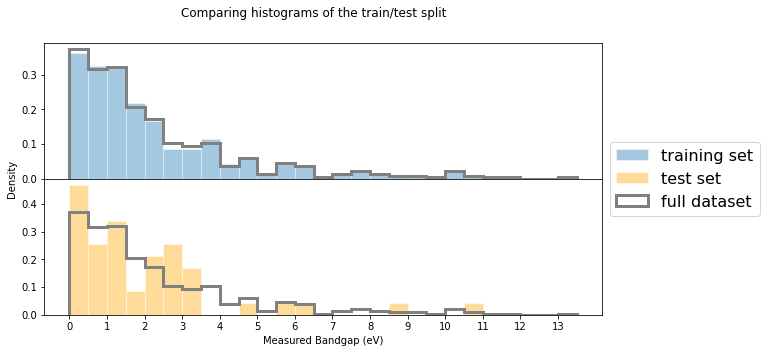

In [32]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5), sharex = True, gridspec_kw={'hspace': 0})
fig.set_tight_layout(False)
myarray = mastml_df_clean["Band gap values Clean"]

bins = np.true_divide(range(28),2)

l1 = sns.distplot(y_train.astype("float"), hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"edgecolor": "white"}, label = 'training set', ax = ax1)
l2 = sns.distplot(y_test.astype("float"), hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"edgecolor": "white", "color": "orange"}, label = 'test set', ax = ax2)
l3 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, ax = ax1)
l4 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, label = 'full dataset', ax = ax2)

ax1.set_xticks(range(14))
ax2.set_xticks(range(14))
ax2.xaxis.label.set_visible(False)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.suptitle('Comparing histograms of the train/test split')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.legend(handles, labels, loc = 'center left', bbox_to_anchor=(1, 0.5),prop={'size': 16})
plt.xlabel('Measured Bandgap (eV)')
_ = plt.ylabel('Density')

Clearly, we can see that the dataset is very small. Hence their are differences in histograms of training and testing dataset.

In real world, the dataset is so huge that their is hardly any difference between the training set and test set.

# **Training our Model using the training dataset**

Now we will train our models and make predictions.
We are using Decision Tree Model for Machine Learning. So we are going to fit a decision tree model to the training data.

A decision tree model is basically a random forest model with 1 tree, so we'll set the ```n_estimators``` hyperparameter to 1 to make the model mimic a single decision tree.

In [33]:
Default_model = RandomForestRegressor(random_state=seed,n_estimators=1,bootstrap=False).fit(X_train,y_train) # fit the decision tree model
print('Model training complete.')
# print('Tree depth:', [estimator.tree_.max_depth for estimator in Default_model.estimators_])
# for importance in zip (estimator.feature_importances_ for estimator in Default_model.estimators_):
#     print(importance)
# print('Leaf nodes:',[estimator.tree_.n_leaves for estimator in Default_model.estimators_])

Model training complete.


We have taken an example of Silicon and Silica. 

Silicon is used in practically every electronic device as a semiconductor, and Silica is basic window glass. We know Silicon is a semi-conductor and it's bandgap should be fairly low, while the band gap for Silica has to be much higher because window glass shouldn't absorb any light at all. Based on these predictions it seems like the model can already pick up on these trends.

In [34]:
Default_model_all_data = RandomForestRegressor(random_state=seed,n_estimators=1,bootstrap=False).fit(X_predict,y_predict)

print("Predicting Silicon Band Gap: ",Default_model_all_data.predict(xpredict_Si))

print("Predicting Silica Band Gap: ",Default_model_all_data.predict(xpredict_SiO2))

Predicting Silicon Band Gap:  [2.]
Predicting Silica Band Gap:  [7.7]


## **Evaluating Model Performances**

To evaluate the model performance, we will use it to predict bandgaps of materials it was trained on (training set) as well as materials it has not seen before (test set), and we will compare its performance on both datasets.

There are two main ways to understand and evaluate prediction performance:
1. Qualitatively, we can create a scatter plot with predicted values on the y-axis and the actual measured values on the x-axis, known as <u>parity plots</u> or <u>predicted versus actual plots</u>. The more closely aligned the data points are to the ideal diagonal line, where each prediction matches the measured value perfectly, the better the model performs on that specific dataset. Parity plots also surface outliers, trends and patterns in the prediction results.
2. Quantitatively, we can measure model performance using statistical error metrics. Some of these error metrics, such as RMSE and R2, will be familiar to you if you have taken an introductory statistics class.


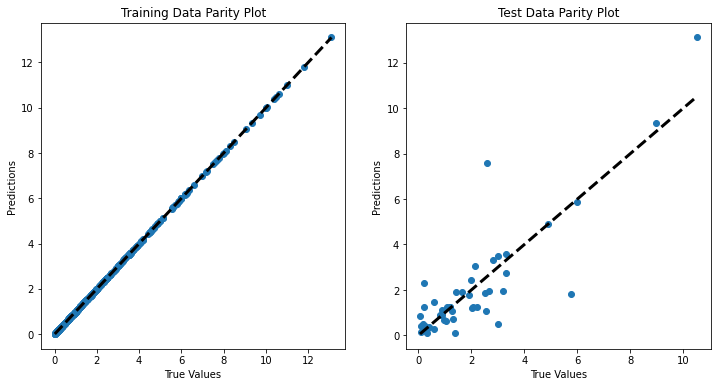

  Error Metric Training Data    Test Data                          Note
0         RMSE   0.0003 (eV)  1.2390 (eV)  (0.0 for perfect prediction)
1     RMSE/std        1.0000       1.0000  (0.0 for perfect prediction)
2          MAE   0.0000 (eV)  0.7400 (eV)  (0.0 for perfect prediction)
3           R2        1.0000       0.7492  (1.0 for perfect prediction)


In [35]:
Train_predictions = Default_model.predict(X_train)    # Make predictions on training data
Test_predictions = Default_model.predict(X_test)      # Make predictions on testing data
def parity_plots_side_by_side(y_train, train_predictions, y_test, test_predictions, title_left="Training Data Parity Plot", title_right="Test Data Parity Plot"):
    # Create figure and subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot left parity plot
    axs[0].scatter(y_train, train_predictions)
    axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
    axs[0].set_xlabel('True Values')
    axs[0].set_ylabel('Predictions')
    axs[0].set_title(title_left)

    # Plot right parity plot
    axs[1].scatter(y_test, test_predictions)
    axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    axs[1].set_xlabel('True Values')
    axs[1].set_ylabel('Predictions')
    axs[1].set_title(title_right)

    # Display the plots
    plt.show()

def parity_stats_side_by_side(y_train, train_predictions, y_test, test_predictions, train_label="Training Data", test_label="Test Data"):
    # Calculate error metrics for training data
    train_rmse = np.sqrt(np.mean((y_train - train_predictions)**2))
    train_rmse_std = train_rmse / np.std(y_train - train_predictions)
    train_mae = np.mean(np.abs(y_train - train_predictions))
    train_r2 = np.corrcoef(y_train, train_predictions)[0,1]**2
    
    # Calculate error metrics for test data
    test_rmse = np.sqrt(np.mean((y_test - test_predictions)**2))
    test_rmse_std = test_rmse / np.std(y_test - test_predictions)
    test_mae = np.mean(np.abs(y_test - test_predictions))
    test_r2 = np.corrcoef(y_test, test_predictions)[0,1]**2
    
    # Create a DataFrame to display the parity statistics
    data = {"Error Metric": ["RMSE", "RMSE/std", "MAE", "R2"],
            train_label: [f"{train_rmse:.4f} (eV)", f"{train_rmse_std:.4f}", f"{train_mae:.4f} (eV)", f"{train_r2:.4f}"],
            test_label: [f"{test_rmse:.4f} (eV)", f"{test_rmse_std:.4f}", f"{test_mae:.4f} (eV)", f"{test_r2:.4f}"],
            "Note": ["(0.0 for perfect prediction)", "(0.0 for perfect prediction)", "(0.0 for perfect prediction)", "(1.0 for perfect prediction)"]}
    df = pd.DataFrame(data)
    print(df)

parity_plots_side_by_side(y_train,Train_predictions,y_test,Test_predictions,title_left="Training Data Parity Plot",title_right="Test Data Parity Plot") # build both plots
parity_stats_side_by_side(y_train,Train_predictions,y_test,Test_predictions,"Training Data","Test Data")  # print error metrics for training data

For visualising our model we can generate an image of the fecision tree using ```graphviz``` package of python.

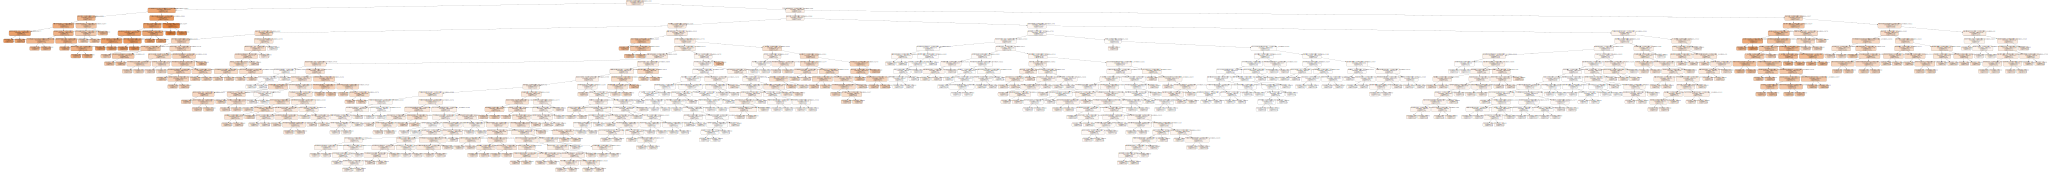

In [36]:
# generate an image of the default decision tree
dot_data = sklearn.tree.export_graphviz(Default_model.estimators_[0],out_file=None,feature_names=features_df_lowcorr.columns,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

# **Conclusion**

We successfully completed our model training and testing and it can be used for predicting which materials are suitable to use in solar cells based on the data given by the user.



# **Complete Layout of My Project / Summary**

1. Read ```csv``` file from Google Drive
2. Filtering data points with reliability=1
3. Average out data from the same input variables
4. Understanding the data
  * Statistics (mean,count,max,etc.)
  * Histograms
  * Categorise the type of elements present and in what quantity throughout the dataset
5. Compositional Average Elemental properties generated using MAST-ML
6. Preparing Datasets for training
  * Removing constant columns
  * Removing highly correlated features
  * Feature normalization(rescaling linearly)
7. Splitting of training and test Data
  * 10% of full dataset as test data and rest as training data
  * See if the splitting is uniform or not
8. Training our model
  * Training Model : Default Decision Tree
  * Predict bandgap of Silicon and silica
9. Evaluating Model Performances
  * Parity Plots and RMSE,RMSE/std, MAE, R2
  * Visualise using graphviz package
10. Conclusion